In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def SEIR(y, N, Rnaught, DI, DE):
    dydts = []
    Ss = []
    Es = []
    Is = []
    Rs = []
    for i in range(0,len(y), 4):
        Ss.append(y[i])
        Es.append(y[i+1])
        Is.append(y[i+2])
        Rs.append(y[i+3])
    for i in range(0,len(y), 4):
        S,E,I,R = np.copy(y[i:i+4])
        dSdt = 0
        for j in range(L):
            dSdt += - S*Is[j]*Rnaught[i//4,j]/(N[j]*DI)
        dEdt = -dSdt - E/DE
        dIdt = E/DE - I/DI
        dRdt = I/DI
        dydts.append(dSdt)
        dydts.append(dEdt)
        dydts.append(dIdt)
        dydts.append(dRdt)
    return dydts

In [20]:
def weight_evolution(Ij,Cij,Cij_bar):
    dCijdt = alphac*((1-Ij/Itheta)*Cij_bar**2*Cij-Cij**3)
    return dCijdt

In [21]:
def evolution(ts,y,Rnaught,Rnaught_bar):
    h = ts[1] - ts[0]
    length = len(y)
    k = [0]*length
    l = [0]*length
    m = [0]*length
    n = [0]*length
    result = np.zeros((len(ts),length))
    result[0] = y
    Cijlist = [Rnaught[1,0]]
    R0efflist = [(Rnaught[0,0]+Rnaught[1,1]+(Rnaught[0,0]**2+4*Rnaught[0,1]*Rnaught[1,0]-2*Rnaught[0,0]*Rnaught[1,1]+Rnaught[1,1]**2)**0.5)*0.5]
    for t in ts[:-1]:
#         print('t=', t)
        k = np.array([h*SEIR(y, N, Rnaught, DI, DE)[j] for j in range(length)])
        temp = [y[i]+k[i]/2 for i in range(length)]
        l = np.array([h*SEIR(temp, N, Rnaught, DI, DE)[j] for j in range(length)])
        temp = [y[i]+l[i]/2 for i in range(length)]
        m = np.array([h*SEIR(temp, N, Rnaught, DI, DE)[j] for j in range(length)])
        temp = [y[i]+m[i] for i in range(length)]
        n = np.array([h*SEIR(temp, N, Rnaught, DI, DE)[j] for j in range(length)])
#         print(k.shape,l.shape,m.shape,n.shape)
        y = y + (k+2*l+2*m+n)/6
        result[int(t+1)] = y
        for i in range(L):
            for j in range(L):
                Cij = Rnaught[i,j]
#                 print('-',i,j,'-')
#                 print(Cij)
                Cij_bar = Rnaught_bar[i,j]
#                 print(Cij_bar)
                Ij = result[int(t)][4*j+3-1]
#                 print(Ij)
                k2 = h*weight_evolution(Ij,Cij,Cij_bar)
                l2 = h*weight_evolution(Ij,Cij+k2/2,Cij_bar)
                m2 = h*weight_evolution(Ij,Cij+l2/2,Cij_bar)
                n2 = h*weight_evolution(Ij,Cij+m2,Cij_bar)
                Cij = Cij + (k2 + 2*l2 + 2*m2 +n2)/6
#                 print(Cij)
                Rnaught[i,j] = Cij
        Cijlist.append(Rnaught[1,0])
        R0efflist.append((Rnaught[0,0]+Rnaught[1,1]+(Rnaught[0,0]**2+4*Rnaught[0,1]*Rnaught[1,0]-2*Rnaught[0,0]*Rnaught[1,1]+Rnaught[1,1]**2)**0.5)*0.5)
    return result,Cijlist,R0efflist

In [22]:
def Initialization(N):
    S = np.copy(N)
    E = [0]*(L)
    I = [0]*(L)
    R = [0]*(L)
    I[0] = 1
    S[0] = S[0] - I[0]
    y0 = []
    catorgories = [S,E,I,R]
    for i in range(L):
        for catorgory in catorgories:
            y0.append(catorgory[i])
#     print(y0)
    return y0

In [23]:
def test(Ij,Cij):
    dCijdt = 0.01*((1-Ij/100)*0.5**2*Cij-Cij**3)
    return dCijdt

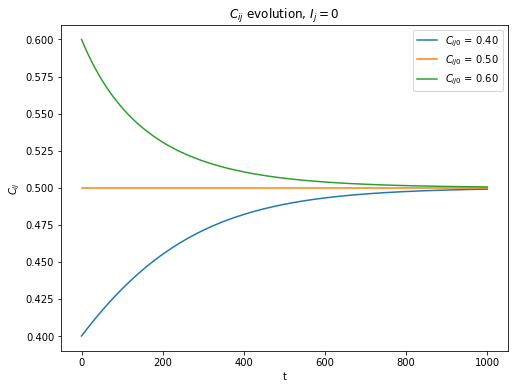

In [24]:
Ij = 0
Cij0s = [0.4,0.5,0.6]
ts= np.linspace(0,1000,1001)

fig = plt.figure(figsize=(8,6))
for Cij0 in Cij0s:
    Cijlist = [Cij0]
#     print(Cijlist)
    Cij = Cij0
    for t in ts[1:]:
        h = ts[1] - ts[0]
#         print(h)
        k2 = h*test(Ij,Cij)
#         print(k2,test(Ij,Cij),0.01*((1-Ij/100)*0.5**2*Cij-Cij**3))
        l2 = h*test(Ij,Cij+k2/2)
        m2 = h*test(Ij,Cij+l2/2)
        n2 = h*test(Ij,Cij+m2)
        Cij = Cij + (k2 + 2*l2 + 2*m2 +n2)/6
        Cijlist.append(Cij)
    plt.plot(ts,Cijlist,'-',label='$C_{ij0}$ = %1.2f'%Cij0)
plt.legend()
plt.title('$C_{ij}$ evolution, $I_{j} = 0$')
plt.xlabel('t')
plt.ylabel('$C_{ij}$')
fig.savefig('cij-evolution-ij0.jpg')

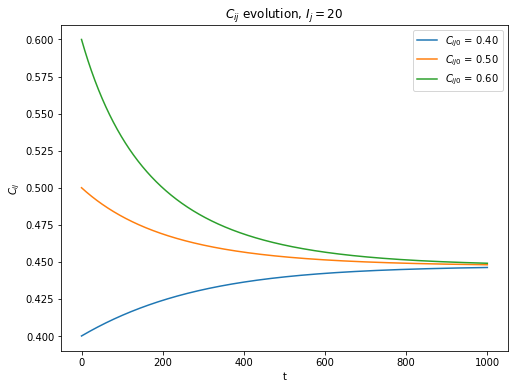

In [25]:
Ij = 20
Cij0s = [0.4,0.5,0.6]
ts= np.linspace(0,1000,1001)

fig = plt.figure(figsize=(8,6))
for Cij0 in Cij0s:
    Cijlist = [Cij0]
#     print(Cijlist)
    Cij = Cij0
    for t in ts[1:]:
        h = ts[1] - ts[0]
#         print(h)
        k2 = h*test(Ij,Cij)
#         print(k2,test(Ij,Cij),0.01*((1-Ij/100)*0.5**2*Cij-Cij**3))
        l2 = h*test(Ij,Cij+k2/2)
        m2 = h*test(Ij,Cij+l2/2)
        n2 = h*test(Ij,Cij+m2)
        Cij = Cij + (k2 + 2*l2 + 2*m2 +n2)/6
        Cijlist.append(Cij)
    plt.plot(ts,Cijlist,'-',label='$C_{ij0}$ = %1.2f'%Cij0)
plt.legend()
plt.title('$C_{ij}$ evolution, $I_{j} = 20$')
plt.xlabel('t')
plt.ylabel('$C_{ij}$')
fig.savefig('cij-evolution-ij20.jpg')

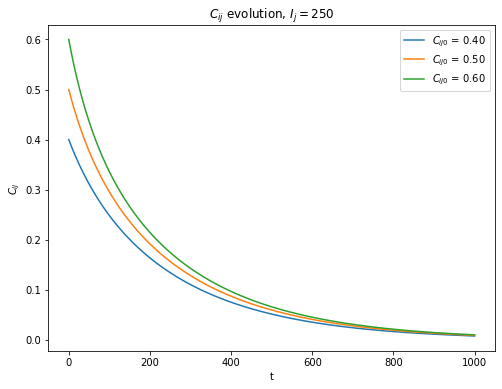

In [26]:
Ij = 250
Cij0s = [0.4,0.5,0.6]
ts= np.linspace(0,1000,1001)

fig = plt.figure(figsize=(8,6))
for Cij0 in Cij0s:
    Cijlist = [Cij0]
#     print(Cijlist)
    Cij = Cij0
    for t in ts[1:]:
        h = ts[1] - ts[0]
#         print(h)
        k2 = h*test(Ij,Cij)
#         print(k2,test(Ij,Cij),0.01*((1-Ij/100)*0.5**2*Cij-Cij**3))
        l2 = h*test(Ij,Cij+k2/2)
        m2 = h*test(Ij,Cij+l2/2)
        n2 = h*test(Ij,Cij+m2)
        Cij = Cij + (k2 + 2*l2 + 2*m2 +n2)/6
        Cijlist.append(Cij)
    plt.plot(ts,Cijlist,'-',label='$C_{ij0}$ = %1.2f'%Cij0)
plt.legend()
plt.title('$C_{ij}$ evolution, $I_{j} = 250$')
plt.xlabel('t')
plt.ylabel('$C_{ij}$')
fig.savefig('cij-evolution-ij250.jpg')

In [93]:
L = 2 #Taiwan
N = [10000]*L
DE = 5
DI = 7
Rnaught = np.ones((L,L))*np.random.random()*2
Rnaught_bar = np.ones((L,L))
for i in range(L):
    Rnaught[i,i] = np.random.random()*2
for i in range(L):
    for j in range(L):
        Rnaught_bar[i,j] = Rnaught[i,j]
y0 = Initialization(N)
ts = np.linspace(0,365*8,365*8+1)
alphac = 0.01
Itheta = 30

# Integrate the SIR equations over the time grid, t.
ret, Clist,R0list = evolution(ts, y0,Rnaught,Rnaught_bar)

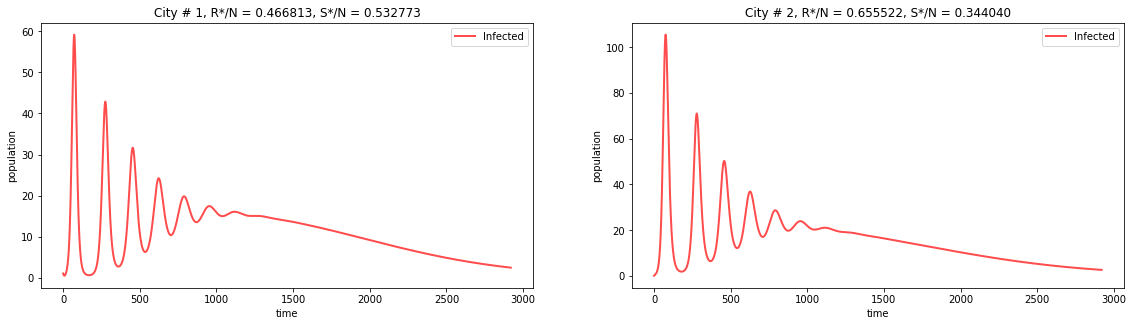

In [94]:
fig = plt.figure(figsize=(30,40))
for i in range(0,L*4,4): #for cities
    plt.subplot(7,3,(i//4)+1)
#     plt.plot(ts, ret.T[i], 'b', alpha=0.7, linewidth=2, label='Susceptible')
#     plt.plot(ts, ret.T[i+1], 'y', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(ts, ret.T[i+2], 'r', alpha=0.7, linewidth=2, label='Infected')
#     plt.plot(ts, ret.T[i+3], 'g', alpha=0.7, linewidth=2, label='Recovered')
#     plt.plot(ts, ret.T[i]+ret.T[i+1]+ret.T[i+2]+ret.T[i+3], 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.legend()
    plt.ylabel('population')
    plt.xlabel('time')
    plt.title('City # %d, R*/N = %f, S*/N = %f'%(i//4+1, ret.T[i+3][-1]/N[i//4],ret.T[i][-1]/N[i//4]))

In [95]:
fig.savefig('evolution.jpg')

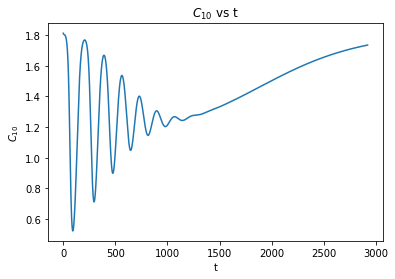

In [96]:
fig = plt.figure()
plt.plot(ts,Clist,'-')
plt.title('$C_{10}$ vs t')
plt.ylabel('$C_{10}$')
plt.xlabel('t')
fig.savefig('C10-evolution.jpg')

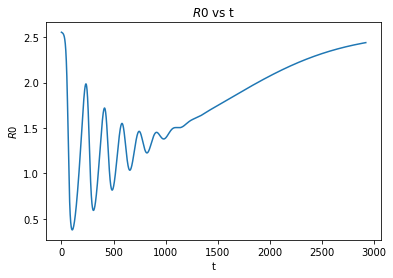

In [97]:
fig = plt.figure()
plt.plot(ts,R0list,'-')
plt.title('$R0$ vs t')
plt.ylabel('$R0$')
plt.xlabel('t')
fig.savefig('R0-evolution.jpg')

In [68]:
print((1-ret.T[2][-1]/Itheta)**0.5*Clist[0],Clist[-1])

0.735170666082731 0.7338800840839196


In [108]:
L = 2 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*L
DE = 5
DI = 7
    
        
y0 = Initialization(N)
Rs = np.linspace(0,1,20)
ts = np.linspace(0,365*5,365*5+1)

for R0ii in [0.7]:
    Rstar = []
    for R in Rs:
        Rnaught = np.ones((L,L))*R
        Rnaught_bar = np.zeros((L,L))
        for i in range(L):
            Rnaught[i,i] = R0ii
        for i in range(L):
            for j in range(L):
                Rnaught_bar[i,j] = Rnaught[i,j]
        y0 = Initialization(N)
        ret,_,_ = evolution(ts,y0,Rnaught,Rnaught_bar)
        Rstar.append(ret.T[7][-1]/N[1])

/Users/meiiansam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


Text(0, 0.5, '$R_{0ii}$')

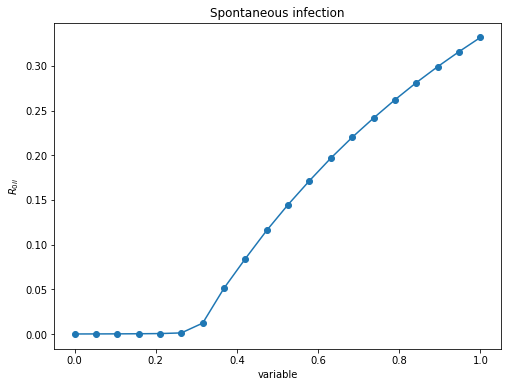

In [109]:
fig = plt.figure(figsize = (8,6))
plt.plot(Rs,Rstar,'o-')
plt.title('Spontaneous infection')
plt.xlabel('variable')
plt.ylabel('$R_{0ii}$')

In [110]:
Rstar2 = [1.3345594969476013e-06, 1.3769397039967274e-06, 1.5219306302296642e-06, 1.845880080470354e-06, 2.6294358961649008e-06, 5.769742104244792e-06, 0.0001263426081159819, 0.04965386950603527, 0.20740565718798765, 0.28059112589385227, 0.34486393731762793, 0.40193023323148713, 0.45279655437455363, 0.4982990469879865, 0.5391377484059869, 0.5759024910999345, 0.6090931944579978, 0.6391359004629635, 0.6663955493364103, 0.6911862352981311]

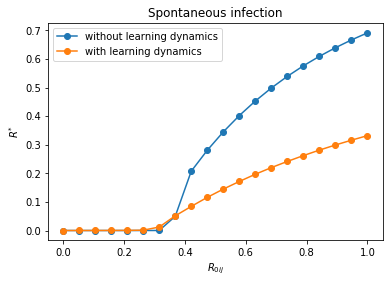

In [115]:
fig = plt.figure(figsize = (6,4))
plt.plot(Rs,Rstar2, 'o-' ,label = 'without learning dynamics')
plt.plot(Rs,Rstar,'o-', label = 'with learning dynamics')
plt.title('Spontaneous infection')
plt.xlabel('$R_{0ij}$')
plt.ylabel('$R^{*}$')
plt.legend()

In [116]:
fig.savefig('compare-the-spontaneous-infection.png')

comment the above graph: #thershold doesn't change